<a href="https://colab.research.google.com/github/madmattbr/udacity_data_analytics_nanodegree/blob/main/analise_vinhos_udacity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Estudo de dados com duas fontes de vinhos brancos e vermelhos

## Importação de Bibliotecas e outros que serão usados no projeto

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier

In [ ]:
df_branco = pd.read_csv('/content/drive/MyDrive/Collab_datasets/winequality-white.csv',sep = ';')
df_vermelho = pd.read_csv('/content/drive/MyDrive/Collab_datasets/winequality-red.csv', ';')

## Vamos verificar os dados

In [ ]:
df_branco.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df_branco.shape

(4898, 12)

In [ ]:
df_vermelho.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur-dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df_vermelho.shape

(1599, 12)

##Vamos arrumar o nome de uma coluna que está fora do padrão

In [ ]:
df_vermelho.rename(columns={'total_sulfur-dioxide':'total_sulfur_dioxide'}, inplace = True)

##Vamos começar a trabalhar os dados

Primeiramente vou colocar todos os dados em um dataframe só.<br>
Criarei uma nova coluna com o tipo do vinho e irei usar o np para preencher os dados dessa coluna.<br>
Os vinhos brancos receberão 1 e os vermelhos receberão 0.


In [ ]:
def rotula(dado,valor):
  dado['color'] = np.repeat(valor,dado.shape[0])

In [ ]:
rotula(df_branco,1)
rotula(df_vermelho,0)

In [ ]:
#Criando um novo DF
dados = pd.concat([df_branco,df_vermelho])

In [ ]:
dados

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


## Vamos verificar e arrumar (caso seja necessario) se há dados nulos ou ausentes.Assim como se há dados duplicados, ou tipagem errada das variáveis.

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [ ]:
dados.duplicated().sum()

1177

In [ ]:
dados.drop_duplicates(inplace = True)


In [ ]:
#resetando o indice do df
dados.reset_index(drop= True, inplace = True)

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         5320 non-null   float64
 1   volatile_acidity      5320 non-null   float64
 2   citric_acid           5320 non-null   float64
 3   residual_sugar        5320 non-null   float64
 4   chlorides             5320 non-null   float64
 5   free_sulfur_dioxide   5320 non-null   float64
 6   total_sulfur_dioxide  5320 non-null   float64
 7   density               5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulphates             5320 non-null   float64
 10  alcohol               5320 non-null   float64
 11  quality               5320 non-null   int64  
 12  color                 5320 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 540.4 KB


Todos os dados estão OK. 1177 entradas foram excluidas por serem duplicadas.

In [ ]:
dados.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,1


## Analise de Correlação

In [ ]:
df_corr = dados.select_dtypes(exclude=['int8', 'uint8'])

In [ ]:
matrix_corr = df_corr.corr()
matrix_corr

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
fixed_acidity,1.000000,0.214752,0.330328,-0.104439,0.288918,-0.281590,-0.327471,0.478180,-0.271182,0.304844,-0.102573,-0.080092,-0.486253
volatile_acidity,0.214752,1.000000,-0.384192,-0.163696,0.367626,-0.349039,-0.400716,0.308452,0.246687,0.227772,-0.065411,-0.265205,-0.645335
citric_acid,0.330328,-0.384192,1.000000,0.146189,0.055199,0.130849,0.194835,0.094758,-0.344735,0.059183,-0.005496,0.097954,0.183759
residual_sugar,-0.104439,-0.163696,0.146189,1.000000,-0.123094,0.398717,0.487519,0.520930,-0.234522,-0.174717,-0.305242,-0.056830,0.328695
chlorides,0.288918,0.367626,0.055199,-0.123094,1.000000,-0.186615,-0.269817,0.371867,0.025823,0.405051,-0.269601,-0.202137,-0.499517
free_sulfur_dioxide,-0.281590,-0.349039,0.130849,0.398717,-0.186615,1.000000,0.720488,0.006166,-0.141747,-0.198244,-0.170012,0.054002,0.465326
total_sulfur_dioxide,-0.327471,-0.400716,0.194835,0.487519,-0.269817,0.720488,1.000000,0.006711,-0.222956,-0.275836,-0.249004,-0.050296,0.694229
density,0.478180,0.308452,0.094758,0.520930,0.371867,0.006166,0.006711,1.000000,0.034273,0.282690,-0.667811,-0.326434,-0.429377
pH,-0.271182,0.246687,-0.344735,-0.234522,0.025823,-0.141747,-0.222956,0.034273,1.000000,0.168150,0.097314,0.039733,-0.310919
sulphates,0.304844,0.227772,0.059183,-0.174717,0.405051,-0.198244,-0.275836,0.282690,0.168150,1.000000,-0.017232,0.041884,-0.490364


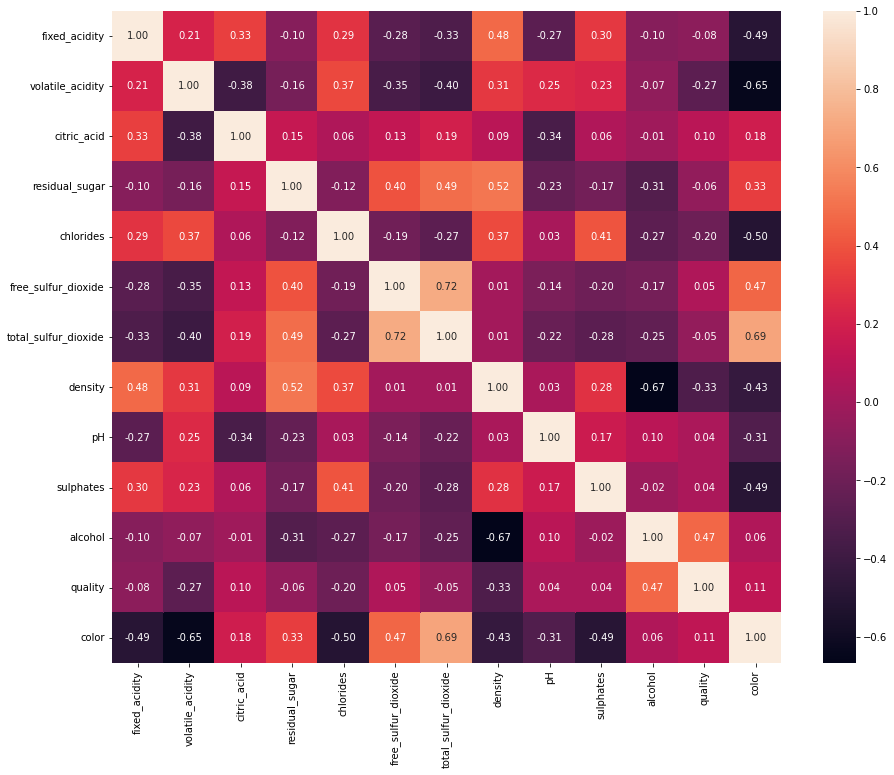

In [ ]:
plt.figure(figsize = (15, 12))
ax = sns.heatmap(matrix_corr,fmt = ".2f",annot = True)

In [ ]:
dados.drop(columns = 'total_sulfur_dioxide', axis = 1, inplace = True )

Decidi eliminar a coluna 'total_sulfur_dioxide' pois a coluna tem uma correlação forte com duas outras features.

##Agora vamos ver insights graficos

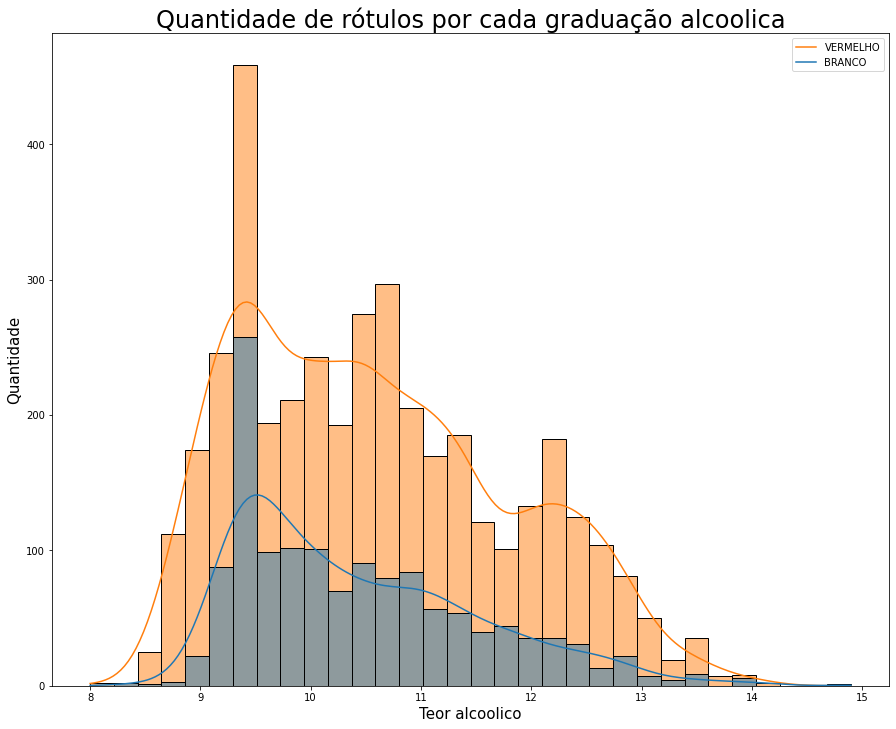

In [ ]:
plt.figure(figsize = (15,12))
ax = sns.histplot(data = dados, x = 'alcohol', kde = True, alpha = 0.5, hue = 'color')
ax.set_title("Quantidade de rótulos por cada graduação alcoolica" , size = 24)
ax.set_xlabel("Teor alcoolico" , size = 15)
ax.set_ylabel("Quantidade", size = 15)
plt.legend(labels = ['VERMELHO','BRANCO'],loc = 'upper right')
plt.show()

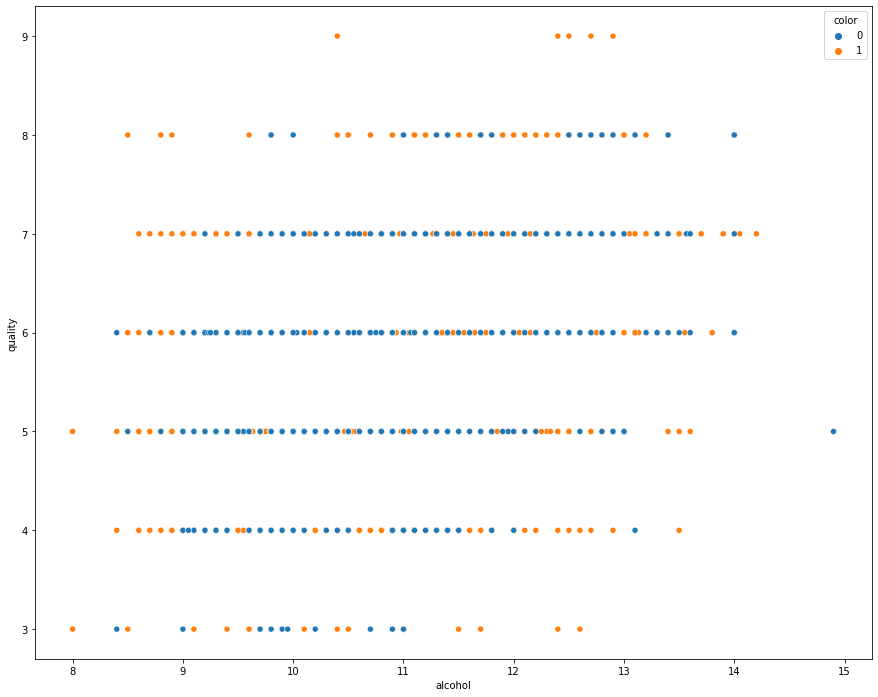

In [ ]:
plt.figure(figsize=(15,12))
ax = sns.scatterplot(data = dados, x = 'alcohol',y = 'quality', hue = 'color')
plt.show()

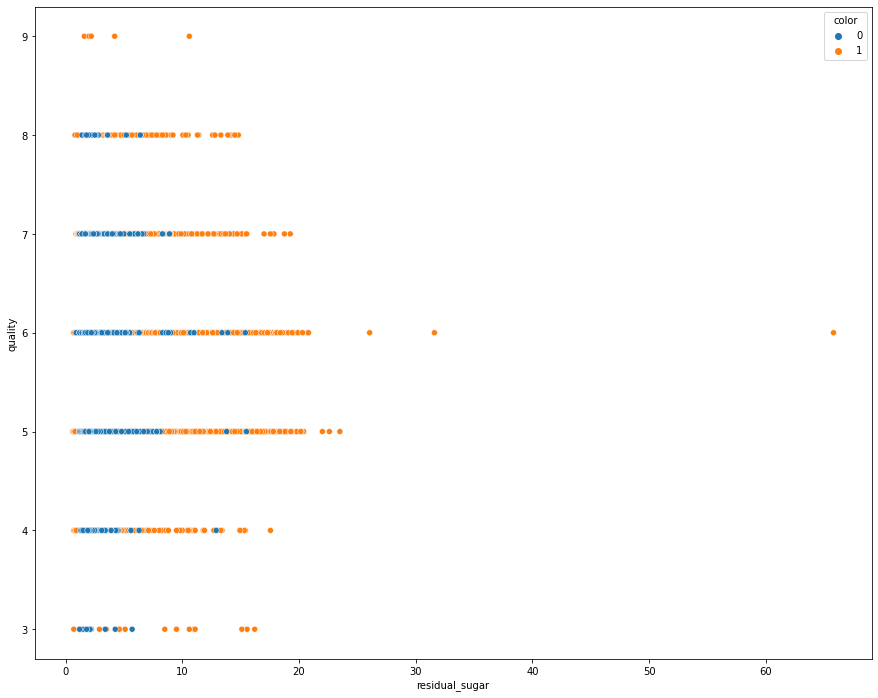

In [ ]:
plt.figure(figsize=(15,12))
ax = sns.scatterplot(data = dados, x = 'residual_sugar',y = 'quality', hue = 'color')
plt.show()

In [ ]:
dados.mean()
dados.groupby('quality').mean()
dados.groupby(['quality', 'color'], as_index=False)['pH'].mean()

,quality,color,pH
0,3,0,3.398000
1,3,1,3.187500
2,4,0,3.381509
3,4,1,3.185425
4,5,0,3.300815
5,5,1,3.171779
6,6,0,3.318000
7,6,1,3.196029
8,7,0,3.290060
9,7,1,3.228462


##Criando uma nova feature : Nivel de acidez.

In [ ]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [2.72,3.11,3.21,3.32,4.01] # Fill in this list with five values you just found

# Labels for the four acidity level groups
bin_names = ["High","Moderately","Medium","Low" ] # Name each acidity level category

# Creates acidity_levels column
dados['acidity_levels'] = pd.cut(dados['pH'], bin_edges, labels=bin_names)

# Find the mean quality of each acidity level with groupby
dados.groupby('acidity_levels')['quality'].mean()

acidity_levels
High          5.728024
Moderately    5.766917
Medium        5.840183
Low           5.847470
Name: quality, dtype: float64

In [ ]:
dados.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.0,0.27,0.36,20.7,0.045,45.0,1.0010,3.00,0.45,8.8,6,1,High
1,6.3,0.30,0.34,1.6,0.049,14.0,0.9940,3.30,0.49,9.5,6,1,Medium
2,8.1,0.28,0.40,6.9,0.050,30.0,0.9951,3.26,0.44,10.1,6,1,Medium
3,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6,1,Moderately
4,6.2,0.32,0.16,7.0,0.045,30.0,0.9949,3.18,0.47,9.6,6,1,Moderately


##Analises

###Vinhos mais alcoolicos recebem melhores notas ?

In [ ]:
selecao = dados.groupby(['quality'])['alcohol'].mean()
selecao = pd.DataFrame(selecao)
selecao

,alcohol
quality,
3,10.215000
4,10.215049
5,9.872211
6,10.649060
7,11.511020
8,11.912162
9,12.180000


Text(0, 0.5, 'Average Quality Rating')

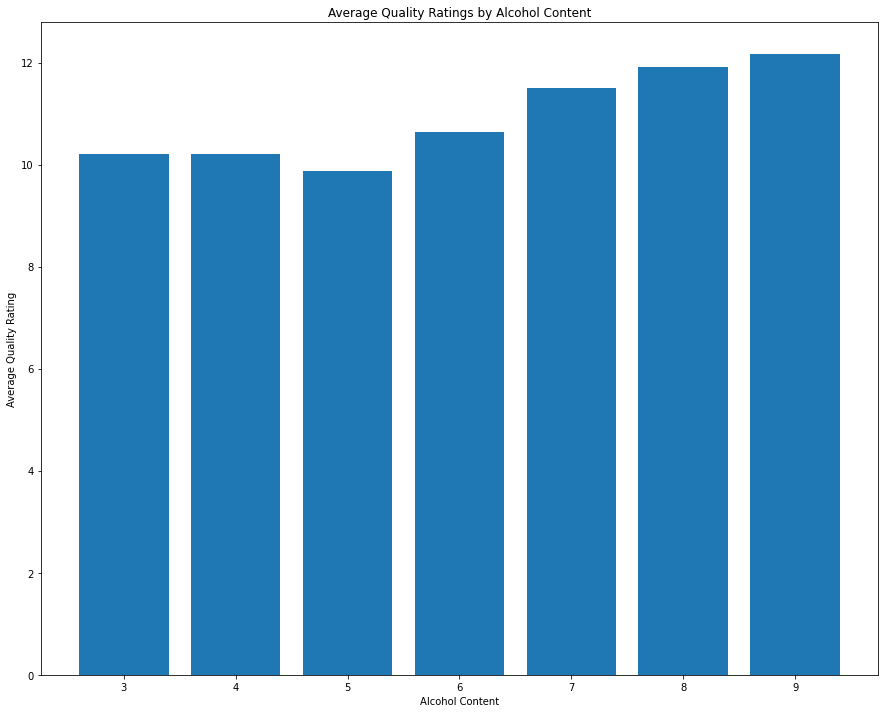

In [ ]:
# Create a bar chart with proper labels
plt.figure(figsize=(15,12))
locations = selecao.index
heights = selecao.alcohol
plt.bar(locations, heights)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating')

Os maiores teores alcoolicos possuem maiores notas.

### Vinhos mais doces possuem maiores notas?

In [ ]:
selecao = dados.groupby(['quality'])['residual_sugar'].mean()
selecao = pd.DataFrame(selecao)
selecao

,residual_sugar
quality,
3,5.140000
4,4.034951
5,5.481906
6,5.153142
7,4.171320
8,4.771622
9,4.120000


Text(0, 0.5, 'Average Quality Rating')

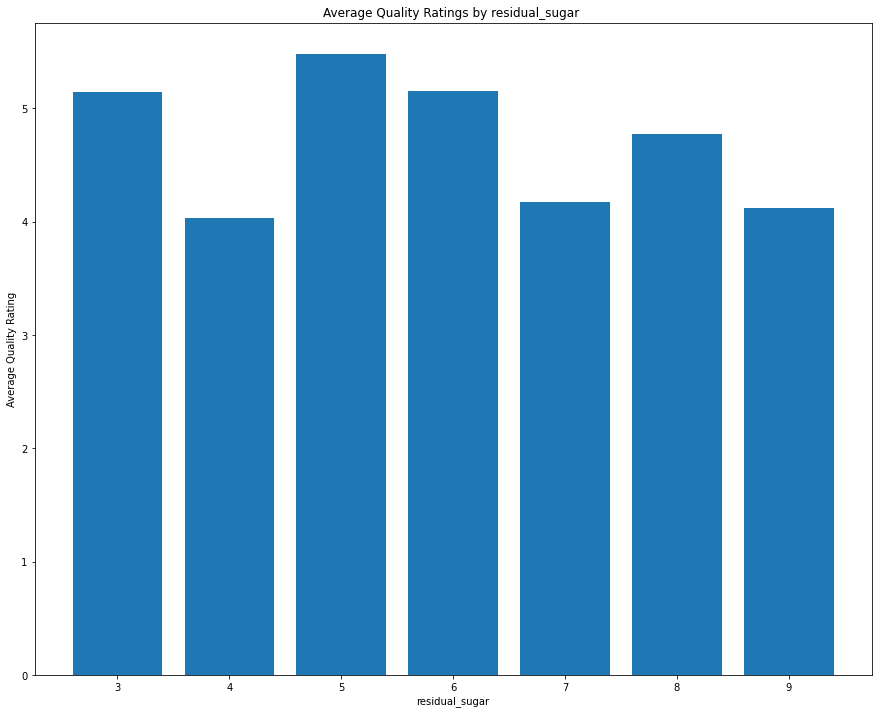

In [ ]:
# Create a bar chart with proper labels
plt.figure(figsize=(15,12))
locations = selecao.index
heights = selecao.residual_sugar
plt.bar(locations, heights)
plt.title('Average Quality Ratings by residual_sugar ')
plt.xlabel('residual_sugar')
plt.ylabel('Average Quality Rating')

Residual de açucar aparenta não ser tão relevante para maiores notas.

###Vinhos Brancos recebem notas melhores ?

In [41]:
selecao = dados.groupby(['color'])['quality'].mean()
selecao = pd.DataFrame(selecao)
selecao

,quality
color,
0,5.623252
1,5.854835


Text(0, 0.5, 'Average Quality Rating')

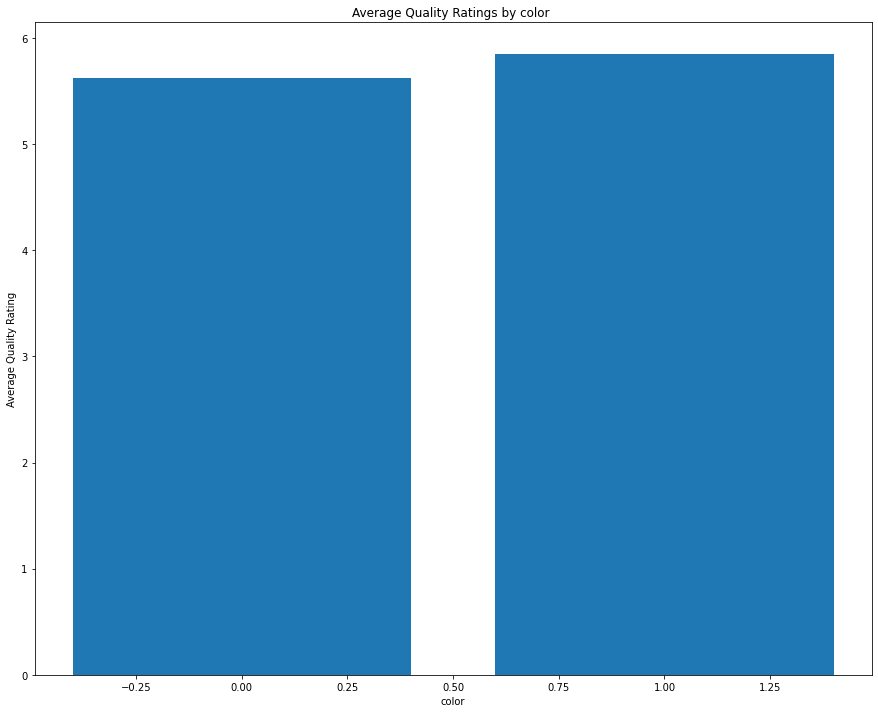

In [45]:
# Create a bar chart with proper labels
plt.figure(figsize=(15,12))
locations = selecao.index
heights = selecao.quality
plt.bar(locations, heights)
plt.title('Average Quality Ratings by color ')
plt.xlabel('color')
plt.ylabel('Average Quality Rating')

Apesar de estar com dificuldades no plot,consigo ver que os brancos possuem uma media levemente maior da nota. Mas nada muito significativo.

## Agora vamos criar um modelo de ML para prever a qualidade de um vinho

###Vamos separar as variaveis e depois verificar se a target esta balanceada.

In [46]:
y = dados['quality']
x = dados.drop(['quality'], axis = 1)

In [48]:
y.value_counts()

6    2323
5    1752
7     856
4     206
8     148
3      30
9       5
Name: quality, dtype: int64